# **<font color="#42f5f5">7.0 REGRESSION TASK</font>**

## **<font color="#FBBF44">7.1 Simple Linear Regression</font>**

In [ ]:
X_train_array = X_train.to_numpy()

In [ ]:
X_test_array = X_test.to_numpy()

In [ ]:
X_train_array[:,366].reshape(-1,1)

array([[3.05e-05],
       [3.05e-05],
       [3.05e-05],
       ...,
       [3.05e-05],
       [9.16e-05],
       [6.10e-05]])

In [ ]:
X_train_reshape = X_train.iloc[:,366]

In [ ]:
X_train_reshape

0       0.000030
1       0.000030
2       0.000030
3       0.000030
4       0.000030
          ...   
1823    0.000030
1824    0.000030
1825    0.000030
1826    0.000092
1827    0.000061
Name: lag1_q99_w4, Length: 1828, dtype: float64

In [ ]:
sel = SelectKBest(f_classif, k=2)
X_train_sel = sel.fit_transform(X_train, y_train)
X_test_sel = sel.transform(X_test)

In [ ]:
X_train_sel[:,0]

array([132.6936437 , 129.7173852 , 131.6116204 , ..., 109.0886966 ,
        98.79896959, 103.1662348 ])

In [ ]:
X_train_sel[:,1]

array([147.4234184, 144.5641365, 144.4899086, ..., 113.1337283,
       105.8184606, 104.2184286])

In [ ]:
X_train.columns.get_loc("mfcc_std_w2")

215

In [ ]:
X_train.columns.get_loc("mfcc_std_w3")

300

R2: 0.879
MSE: 54.354
MAE: 7.363


,Actual value,Predicted value
0,147.241603,153.990188
1,143.285375,150.103602
2,145.888818,152.661215
3,146.973084,153.726395
4,153.424454,160.064202
...,...,...
619,107.532620,114.980206
620,96.318772,103.963757
621,90.572561,98.318696
622,85.425313,93.262056


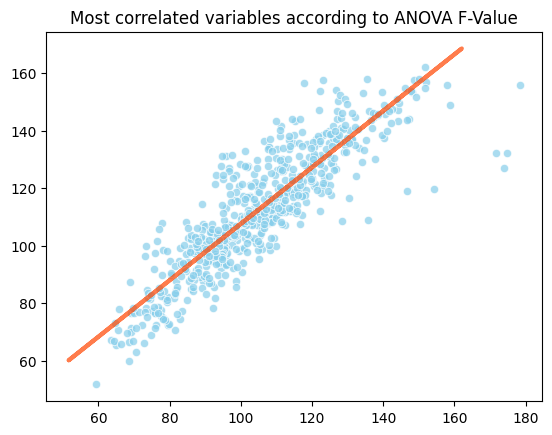

In [ ]:
reg = LinearRegression()
reg.fit(X_train_array[:,215].reshape(-1, 1), X_train_array[:,300].reshape(-1, 1))
y_pred = reg.predict(X_test_array[:,300].reshape(-1, 1)).reshape(1,-1)[0]

plt.scatter(X_test_array[:,215], X_test_array[:,300], color='skyblue',edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(X_test_array[:,300], y_pred, color='orangered', linewidth=3, alpha = .7)
plt.title('Most correlated variables according to ANOVA F-Value')

print('R2: %.3f' % r2_score(X_test_array[:,300], y_pred))
print('MSE: %.3f' % mean_squared_error(X_test_array[:,300], y_pred))
print('MAE: %.3f' % mean_absolute_error(X_test_array[:,300], y_pred))

reg_diff = pd.DataFrame({'Actual value': X_test_array[:,300], 'Predicted value': y_pred})
reg_diff

In [ ]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.98
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]

In [ ]:
to_drop

['mean',
 'q01',
 'q95',
 'q99',
 'lag1_mean',
 'lag1_q01',
 'lag1_q95',
 'lag1_q99',
 'zc_std',
 'zc_skew',
 'length_w1',
 'mean_w1',
 'q01_w1',
 'q99_w1',
 'lag1_mean_w1',
 'lag1_q75_w1',
 'lag1_q95_w1',
 'lag1_q99_w1',
 'stft_q99_w1',
 'length_w2',
 'mean_w2',
 'q01_w2',
 'q05_w2',
 'q95_w2',
 'q99_w2',
 'lag1_mean_w2',
 'lag1_q01_w2',
 'lag1_q05_w2',
 'lag1_q75_w2',
 'lag1_q95_w2',
 'lag1_q99_w2',
 'sc_q99_w2',
 'stft_q50_w2',
 'length_w3',
 'mean_w3',
 'q05_w3',
 'q95_w3',
 'q99_w3',
 'lag1_mean_w3',
 'lag1_q01_w3',
 'lag1_q05_w3',
 'lag1_q75_w3',
 'lag1_q95_w3',
 'lag1_q99_w3',
 'zc_skew_w3',
 'stft_q50_w3',
 'stft_skew_w3',
 'length_w4',
 'mean_w4',
 'lag1_mean_w4',
 'lag1_q01_w4',
 'lag1_q95_w4',
 'lag1_q99_w4',
 'sc_q99_w4']

In [ ]:
X_train.columns.get_loc("mfcc_mean_w3")

299

In [ ]:
X_train.columns.get_loc("mfcc_mean_w2")

214

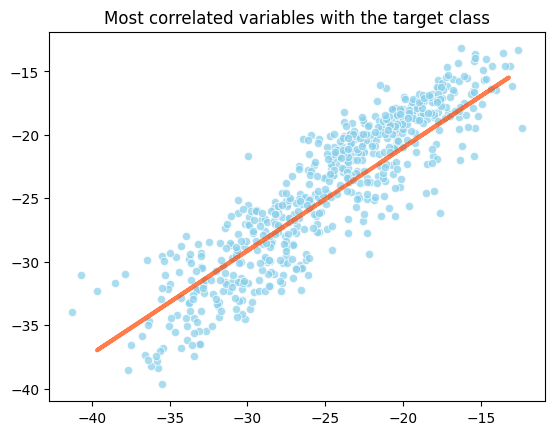

R2: 0.963
MSE: 1.234
MAE: 0.954


,Actual value,Predicted value
0,-21.467392,-22.200227
1,-20.362261,-21.303128
2,-20.945551,-21.776618
3,-21.791002,-22.462920
4,-20.342298,-21.286923
...,...,...
619,-27.343644,-26.970321
620,-27.178381,-26.836167
621,-24.842447,-24.939955
622,-22.566800,-23.092680


In [ ]:
reg = LinearRegression()
reg.fit(X_train_array[:,299].reshape(-1, 1), X_train_array[:,214].reshape(-1, 1))
y_pred = reg.predict(X_test_array[:,299].reshape(-1, 1)).reshape(1,-1)[0]

plt.scatter(X_test_array[:,214], X_test_array[:,299], color='skyblue',edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(X_test_array[:,299], y_pred, color='orangered', linewidth=3, alpha = .7)
plt.title('Most correlated variables with the target class')
plt.show()

print('R2: %.3f' % r2_score(X_test_array[:,299], y_pred))
print('MSE: %.3f' % mean_squared_error(X_test_array[:,299], y_pred))
print('MAE: %.3f' % mean_absolute_error(X_test_array[:,299], y_pred))

reg_diff = pd.DataFrame({'Actual value': X_test_array[:,299], 'Predicted value': y_pred})
reg_diff

In [ ]:
X_train.columns.get_loc("mfcc_min_w1")

131

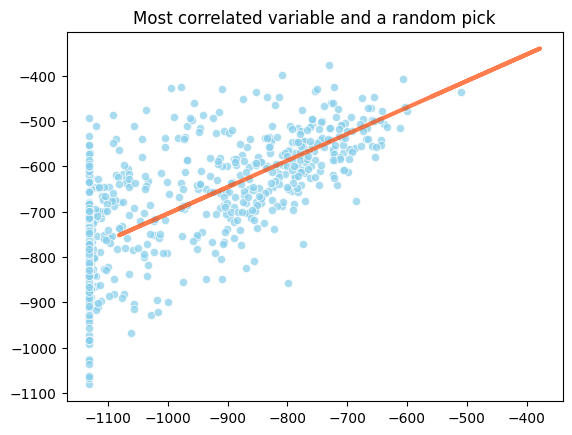

R2: -0.688
MSE: 28969.390
MAE: 161.298


,Actual value,Predicted value
0,-889.038669,-639.556277
1,-927.788238,-662.236160
2,-903.999136,-648.312546
3,-881.793433,-635.315686
4,-915.065249,-654.789473
...,...,...
619,-696.109476,-526.636016
620,-579.614394,-458.452166
621,-493.697489,-408.165534
622,-539.926370,-435.223012


In [ ]:
reg = LinearRegression()
reg.fit(X_train_array[:,131].reshape(-1, 1), X_train_array[:,216].reshape(-1, 1))
y_pred = reg.predict(X_test_array[:,216].reshape(-1, 1)).reshape(1,-1)[0]

plt.scatter(X_test_array[:,131], X_test_array[:,216], color='skyblue',edgecolor='white', linewidth = .7, alpha = .7)
plt.plot(X_test_array[:,216], y_pred, color='orangered', linewidth=3, alpha = .7)
plt.title('Most correlated variable and a random pick')
plt.show()

print('R2: %.3f' % r2_score(X_test_array[:,216], y_pred))
print('MSE: %.3f' % mean_squared_error(X_test_array[:,216], y_pred))
print('MAE: %.3f' % mean_absolute_error(X_test_array[:,216], y_pred))

reg_diff = pd.DataFrame({'Actual value': X_test_array[:,216], 'Predicted value': y_pred})
reg_diff

## **<font color="#FBBF44">7.2 Multiple Linear Regression</font>**


In [ ]:
normalized_df = (X_train-X_train.min())/(X_train.max()-X_train.min())
normalized_df_test = (X_test-X_test.min())/(X_test.max()-X_test.min())


In [ ]:
normalized_df.shape

(1828, 425)

In [ ]:
X = normalized_df.iloc[:,0:424]
y = y_train

In [ ]:
Xtest = normalized_df_test.iloc[:,0:424]
ytest = y_test

In [ ]:
sel_uni = SelectKBest(score_func=chi2, k=35)
X_train_sel_uni = sel_uni.fit(X_train_scale,y_train)

dfscores = pd.DataFrame(X_train_sel_uni.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']

print(featureScores.nlargest(35,'Score'))

X_test_sel_uni = sel_uni.fit_transform(X_test_scale,y_test)

         Feature       Score
5            max  142.185087
260       max_w3  129.775989
175       max_w2  124.577865
272  lag1_std_w3   93.089949
294    zc_q95_w3   93.020671
26      lag1_q99   89.440593
281  lag1_q99_w3   87.126763
17      lag1_std   86.677165
196  lag1_q99_w2   86.438527
274  lag1_max_w3   84.672042
12           q99   83.735258
258       std_w3   83.699053
25      lag1_q95   83.265843
19      lag1_max   82.592797
267       q99_w3   82.437221
3            std   82.428282
187  lag1_std_w2   81.183263
195  lag1_q95_w2   79.465268
280  lag1_q95_w3   78.696438
266       q95_w3   78.695694
182       q99_w2   75.633994
189  lag1_max_w2   73.920330
11           q95   70.736824
173       std_w2   68.900182
279  lag1_q75_w3   68.240048
265       q75_w3   67.825465
194  lag1_q75_w2   59.516928
181       q95_w2   56.388124
180       q75_w2   55.230212
45      mfcc_std   50.840513
300  mfcc_std_w3   42.372035
345       max_w4   40.068248
303  mfcc_q01_w3   38.466720
48      mfcc_q

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train[list(X_train.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,inf,frame_count
1,inf,sum
340,inf,length_w4
85,inf,length_w1
341,inf,sum_w4
...,...,...
372,NaN,zc_min_w4
374,NaN,zc_q01_w4
375,NaN,zc_q05_w4
376,NaN,zc_q25_w4


In [ ]:
vif_infinito = vif_info.loc[vif_info['VIF'] != np.inf]
vif_cols = vif_infinito.loc[vif_infinito['VIF'] < 10 ]
print(len(vif_cols))
vif_cols.sort_values('VIF', ascending=False)

55


,VIF,Column
139,9.700401,mfcc_q99_w1
304,9.495026,mfcc_q05_w3
269,9.422347,skew_w3
223,9.254475,mfcc_q95_w2
132,8.973604,mfcc_max_w1
74,8.231687,stft_min
179,8.191356,q50_w2
9,7.947775,q50
409,7.793067,sc_kur_w4
217,7.704669,mfcc_max_w2


In [ ]:
data_reg_vif = X_train.copy()
data_reg_test_vif = X_test.copy()

data_reg_vif = data_reg_vif[vif_cols['Column']]
data_reg_test_vif = data_reg_test_vif[vif_cols['Column']]

X_train_reg2 = data_reg_vif.values
X_test_reg2 = data_reg_test_vif.values

**<font color="#34eb89">Regular</font>**

In [ ]:
y_train_bin

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg2, y_train)
y_pred = lin_reg.predict(X_test_reg2)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.003
MSE: 5.088
MAE: 1.910


,Actual value,Predicted value
0,5,4.170574
1,5,3.581887
2,5,3.011284
3,5,3.268125
4,1,3.304869
...,...,...
619,3,3.435103
620,3,3.074986
621,3,2.748141
622,3,2.242521


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: -5.291
MSE: 32.088
MAE: 2.077


,Actual value,Predicted value
0,5,5.066683
1,5,3.193429
2,5,6.146531
3,5,5.172537
4,1,2.423484
...,...,...
619,3,3.025288
620,3,2.192514
621,3,1.512536
622,3,0.498303


**<font color="#34eb89">Ridge</font>**

In [ ]:
lin_reg_ridge = Ridge()
lin_reg_ridge.fit(X_train, y_train)
y_pred = lin_reg_ridge.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.120
MSE: 4.490
MAE: 1.749


,Actual value,Predicted value
0,5,4.998125
1,5,3.765886
2,5,5.659756
3,5,4.767752
4,1,2.275839
...,...,...
619,3,3.083051
620,3,2.234079
621,3,2.088768
622,3,0.379458


**<font color="#34eb89">Lasso</font>**

In [ ]:
pca = PCA(n_components=55)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
lin_reg_lasso = Lasso()
lin_reg_lasso.fit(X_train_pca, y_train)
y_pred = lin_reg_lasso.predict(X_test_pca)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.098
MSE: 4.600
MAE: 1.810


,Actual value,Predicted value
0,5,4.769191
1,5,4.961255
2,5,4.893559
3,5,4.765687
4,1,3.749533
...,...,...
619,3,3.042243
620,3,2.488146
621,3,2.567631
622,3,1.598906


In [ ]:
lin_reg_lasso = Lasso()
lin_reg_lasso.fit(X_train, y_train)
y_pred = lin_reg_lasso.predict(X_test)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

reg_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_diff

R2: 0.127
MSE: 4.454
MAE: 1.779


,Actual value,Predicted value
0,5,4.622933
1,5,4.782949
2,5,5.283887
3,5,4.822539
4,1,2.244150
...,...,...
619,3,3.153543
620,3,2.368953
621,3,2.721292
622,3,1.637260


**<font color="#34eb89">GradientBoosting</font>**

Accuracy 0.32211538461538464
F1-score [0.44052863 0.32894737 0.25263158 0.29015544 0.28985507 0.29411765
 0.32286996 0.24096386]
              precision    recall  f1-score   support

           0     0.3817    0.5208    0.4405        96
           1     0.4464    0.2604    0.3289        96
           2     0.2553    0.2500    0.2526        48
           3     0.2887    0.2917    0.2902        96
           4     0.2703    0.3125    0.2899        96
           5     0.5000    0.2083    0.2941        48
           6     0.2835    0.3750    0.3229        96
           7     0.2857    0.2083    0.2410        48

    accuracy                         0.3221       624
   macro avg     0.3389    0.3034    0.3075       624
weighted avg     0.3371    0.3221    0.3179       624



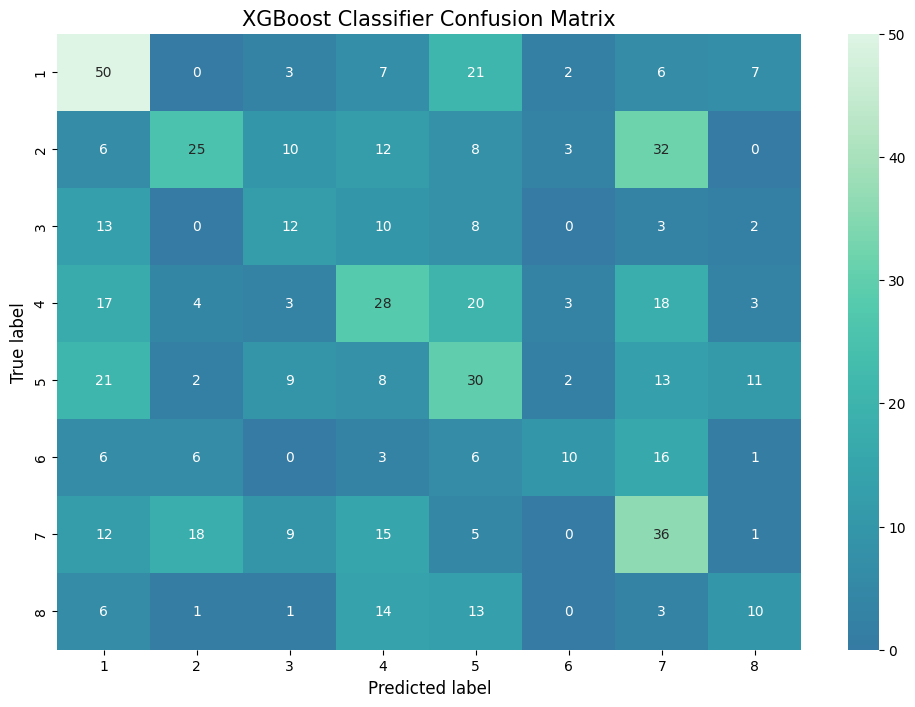

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_reg2, y_train)

y_pred = xgb.predict(X_test_reg2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=4))

model = 'XGBoost Classifier'
cm_xgb = confusion_matrix(y_test,y_pred)
draw_confusion_matrix(cm_xgb, model)

**Gradient Boosting Regressor**

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_reg2, y_train)

y_pred = gbr.predict(X_test_reg2)

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.027
MSE: 4.962
MAE: 1.886
